# Hierarchical Clustering

Hierarchical clustering, also referred to as hierarchical cluster analysis (HCA) is a common algorithm used to group data points with similar attributes. It is able to cluster data using two approaches: agglomerative (bottom-up) and divisive (top-down), shown below.

![fig1](../img/hca.png)

For the purpose of this notebook we will focus on the agglomerative approach. This method treats all data points as individual clusters initially. Larger clusters are then built by calculating the distance between each data point, merging the two closest each time until the desired number of clusters have been achieved.

The kdb+/q implementation of HCA uses euclidean distance metrics and centroid linkage methods to find clusters within data. Additionally, a kd-tree has been used to store the data points, their respective distances and their relative positions in the tree-structure.

### Requirements

The technical dependencies required to run this notebook are as follows:

    - embedPy
    - Matplotlib 2.1.1

### Load HCA

Below loads in the HCA algorithm defined in `hca.q`. The script `kdtree.q` is also used, called within the HCA script. EmbedPy has also been used below to import `matplotlib.pyplot` to visualise the data and resulting clusters.

In [1]:
\l ../hca.q
plt:.p.import`matplotlib.pyplot

### Example 1

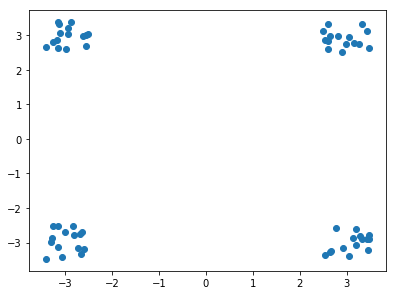

In [2]:
d1:(60#"F";",")0:`:../data/ss5.csv
plt[`:scatter][;]. flip d1;
plt[`:show][];

14 35296


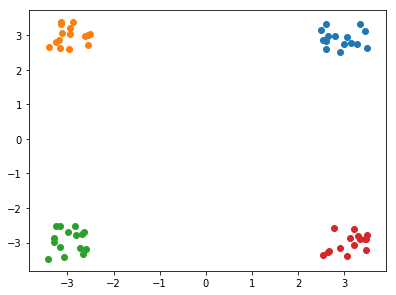

In [3]:
\ts r1:.kd.hc.hc[d1;4;.kd.edist2;`centroid]
{plt[`:scatter][;]. flip x}each r1;
plt[`:show][];

### Example 2

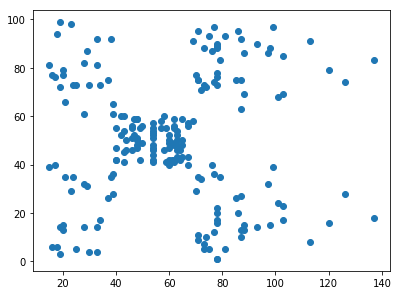

In [4]:
d2:("SSFFF";(),",")0:`:../data/cust.csv
d2:flip d2`Income`SpendingScore
plt[`:scatter][;]. flip d2;
plt[`:show][];

101 119056


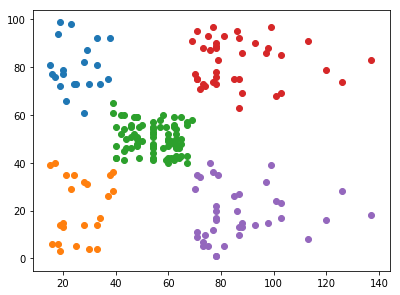

In [5]:
\ts r2:.kd.hc.hc[d2;5;.kd.mdist;`centroid]
{plt[`:scatter][;]. flip x}each r2;
plt[`:show][];

### Example 3

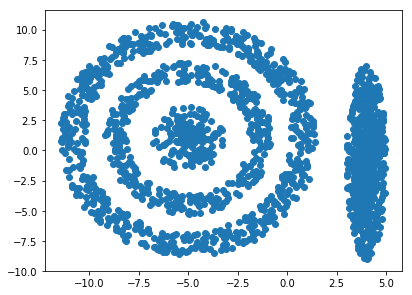

In [6]:
datapts:2000
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
data :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
data,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
data@:neg[datapts&count data]?count data
d3:data
plt[`:scatter][;]. flip d3;
plt[`:show][];

83104 55367424


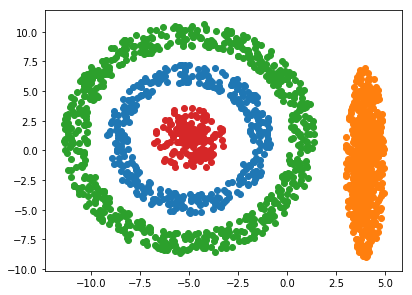

In [7]:
\ts r3:.kd.hc.hc[d3;4;.kd.edist2;`single]
{plt[`:scatter][;]. flip x}each r3;
plt[`:show][];